In [5]:
# 딥러닝을 구동하는데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf
import pandas as pd

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

# 준비된 수술 환자 데이터를 불러들입니다.
Data_set = np.loadtxt("./datasets/ThoraricSurgery.csv", delimiter = ",")

# 환자의 기록과 수술 결과를 X 와 Y로 구분하여 저장합니다.
X = Data_set[:, 0:17]
Y = Data_set[:, 17]

# 딥러닝 구조를 결정합니다.(모델을 설정하고 실행)
model = Sequential()
model.add(Dense(30, input_dim = 17, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# 딥러닝을 실행합니다.
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(X, Y, epochs = 100, batch_size = 10)

Epoch 1/100
47/47 [==============================] - 1s 1ms/step - loss: 10.1326 - accuracy: 0.5064
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 1.5163 - accuracy: 0.7596
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 1.1414 - accuracy: 0.7660
Epoch 4/100
47/47 [==============================] - 0s 900us/step - loss: 0.8955 - accuracy: 0.7681
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.8170
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4788 - accuracy: 0.8383
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.8404
Epoch 8/100
47/47 [==============================] - 0s 940us/step - loss: 0.4616 - accuracy: 0.8426
Epoch 9/100
47/47 [==============================] - 0s 939us/step - loss: 0.4364 - accuracy: 0.8468
Epoch 10/100
47/47 [==============================] - 0s 962us/step - loss: 0.4456 - accuracy: 0.8468


Epoch 1/30
200/200 [==============================] - 0s 885us/step - loss: 1.4933 - mse: 1.4933
Epoch 2/30
200/200 [==============================] - 0s 951us/step - loss: 0.1585 - mse: 0.1585
Epoch 3/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1452 - mse: 0.1452
Epoch 4/30
200/200 [==============================] - 0s 799us/step - loss: 0.1343 - mse: 0.1343
Epoch 5/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 6/30
200/200 [==============================] - 0s 953us/step - loss: 0.1187 - mse: 0.1187
Epoch 7/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1115 - mse: 0.1115
Epoch 8/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 9/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1014 - mse: 0.1014
Epoch 10/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1003 - mse: 0.1003
Epoch 11/30
200/200 [====================

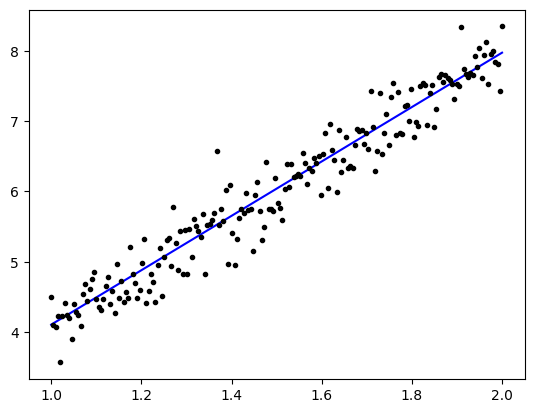

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 가상적인 데이터 생성
X = data = np.linspace(1, 2, 200)    # 시작값 = 1, 종료값 = 2, 개수 = 200
y= X * 4 + np.random.randn(200) * 0.3 # X 를 4배로 하고 편차 0.3 정도의 가우시안 잡음 추가

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.fit(X, y, batch_size=1, epochs=30)

predict=model.predict(data)

plt.plot(data, predict, 'b', data, y, 'k.')   # 첫 번째 그래프는 파란색 마커로
plt.show()
# 두 번째 그래프는 검정색.으로 그린다

(-0.1, 1.1)

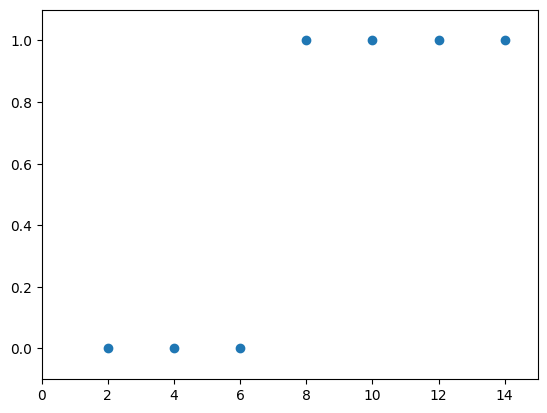

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만듭니다.
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# 그래프로 나타내 봅니다.
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [11]:
# 기울기 a 와 절편 b 의 값을 초기화 합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.05

# 시그모이드 함수를 정의합니다.
def sigmoid(x) :
    return 1 / (1 + np.e ** (-x))

# 경사하강법을 실행합니다.
for i in range(2001) :
    for x_data, y_data in data :
        a_diff = x_data * (sigmoid(a * x_data + b) - y_data)
        b_diff = sigmoid(a * x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0 :      # 1000번 반복될 때마다 각 x_data 값에 대한 현재의 a값, b값을 출력합니다.
            print("epoch = %.f, 기울기 = %.04f, 절편 = %.04f" % (i, a, b))

epoch = 0, 기울기 = -0.0500, 절편 = -0.0250
epoch = 0, 기울기 = -0.1388, 절편 = -0.0472
epoch = 0, 기울기 = -0.2268, 절편 = -0.0619
epoch = 0, 기울기 = 0.1201, 절편 = -0.0185
epoch = 0, 기울기 = 0.2374, 절편 = -0.0068
epoch = 0, 기울기 = 0.2705, 절편 = -0.0040
epoch = 0, 기울기 = 0.2860, 절편 = -0.0029
epoch = 1000, 기울기 = 1.4978, 절편 = -9.9401
epoch = 1000, 기울기 = 1.4940, 절편 = -9.9411
epoch = 1000, 기울기 = 1.4120, 절편 = -9.9547
epoch = 1000, 기울기 = 1.4949, 절편 = -9.9444
epoch = 1000, 기울기 = 1.4982, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4984, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4985, 절편 = -9.9440
epoch = 2000, 기울기 = 1.9065, 절편 = -12.9489
epoch = 2000, 기울기 = 1.9055, 절편 = -12.9491
epoch = 2000, 기울기 = 1.8515, 절편 = -12.9581
epoch = 2000, 기울기 = 1.9057, 절편 = -12.9514
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
